In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
water_parameters = pd.read_csv('C:\\Users\\guilh\\Ironhack\\Final Proj Iron Hack\\Water potability\water_potability.csv')

In [3]:
water_parameters.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# 1.Data treatment

In [4]:
#check for the types of each column
water_parameters.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [5]:
#checking for null values
water_parameters.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
#shows how manny rows and column the dataframe have
water_parameters.shape

(3276, 10)

In [7]:
#calculate the percentage of null values in the pH column compared to the total number of rows
ph_null = (water_parameters['ph'].isnull().sum()/len(water_parameters) ) *100

#calculate the percentage of null values in the Sulfate column compared to the total number of rows
sulfate_null = (water_parameters['Sulfate'].isnull().sum()/len(water_parameters) ) *100

#calculate the percentage of null values in the Trihalomethanes column compared to the total number of rows
trihalo_null = (water_parameters['Trihalomethanes'].isnull().sum()/len(water_parameters) ) *100

print('The percentage of null values in the column ph are',int(ph_null),'%\n')
print('The percentage of null values in the column Sulfate are',int(sulfate_null),'%\n')
print('The percentage of null values in the column Trihalomethanes are',int(trihalo_null),'%')

The percentage of null values in the column ph are 14 %

The percentage of null values in the column Sulfate are 23 %

The percentage of null values in the column Trihalomethanes are 4 %


# 2.Filling null values

The percentage of null values in the columns pH and Sulfate are significative, it will create problems for the model to substitute 
the values with zeros.

A way to solve it is going to be to separate all the rows that have the value zero and one for potability,
and then compute the mean or median for each column where the missing values are relevant.
For precaution i'm goin to do this for all the columns with missing values even if the column Trihalomethanes only have 4 % null values

In [8]:
#selects all the dataframe rows that have  the column potability equal to 1 (potable water)
select_potable = water_parameters.loc[water_parameters['Potability'] == 1]

#selects all the dataframe rows that have  the column potability equal to 0 (non potable water)
select_not_potable = water_parameters.loc[water_parameters['Potability'] == 0]


# 2.1 Filling null values for potable water

In [9]:
"columns to fill : ph ; Sulfate ; Trihalomethanes  "

'columns to fill : ph ; Sulfate ; Trihalomethanes  '

In [10]:
#based on the histograms above the distribuiton seems close to a normal, the mean to fill the missing values would be a good option
ph_mean= select_potable['ph'].mean() 
select_potable['ph'].fillna(value=ph_mean, inplace=True)

ph_mean= select_potable['Sulfate'].mean() 
select_potable['Sulfate'].fillna(value=ph_mean, inplace=True)

ph_mean= select_potable['Trihalomethanes'].mean() 
select_potable['Trihalomethanes'].fillna(value=ph_mean, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


# 2.2 Filling null values for non potable water

In [11]:
"columns to fill : ph ; Sulfate ; Trihalomethanes  "

'columns to fill : ph ; Sulfate ; Trihalomethanes  '

In [12]:
# filling missing value using fillna()  
ph_mean= select_not_potable['ph'].mean() 
select_not_potable['ph'].fillna(value=ph_mean, inplace=True)

ph_mean= select_not_potable['Sulfate'].median() 
select_not_potable['Sulfate'].fillna(value=ph_mean, inplace=True)

ph_mean= select_not_potable['Trihalomethanes'].median() 
select_not_potable['Trihalomethanes'].fillna(value=ph_mean, inplace=True)

# 2.3 Concatenate the rows for potable water with the ones for non potable water

# Splitting the target and the features

In [13]:
water_df_clean = pd.concat([select_potable, select_not_potable])

In [14]:
y = water_df_clean['Potability']
X = water_df_clean.drop(['Potability'],axis=1)

In [15]:
# Creating the train and the test.
from sklearn.model_selection import train_test_split
#random state equal to 42 because is the Answer to the Ultimate Question of Life (he Hitchhiker's Guide to the Galaxy hehe)
#random stare equal to 42 or other number just defines that each time we run it will give the same output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=None, random_state =42)

# 1.Prediction models

# 1.3 Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(random_state=1) #not defining any hyperparameters
forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [18]:
forest_model.score(X_test,y_test)

0.7704517704517705

In [19]:
forest = RandomForestClassifier(bootstrap= True, max_depth= 50, max_features= 'sqrt', min_samples_leaf= 4,min_samples_split= 5,n_estimators= 1000)
forest.fit(X_train,y_train)
forest.score(X_test,y_test)

0.7765567765567766

In [20]:
from sklearn.metrics import recall_score

In [21]:
water_prediction = pd.Series(forest.predict(X),name='Potability')

In [22]:
#water_prediction
recall_score(y, water_prediction, average='micro')

0.9212454212454212

# Check for the most important features and plot the two most important
# because the average for potable and non potable looks the same for all the features see more using a visualization!!!

# Note: the features importance takes the model in account is the features for the model (random forest classifier)!!!

<AxesSubplot:>

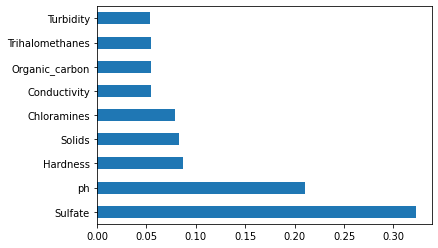

In [37]:
feat_importances = pd.Series(forest.feature_importances_, index=X.columns)
feat_importances.nlargest(9).plot(kind='barh')

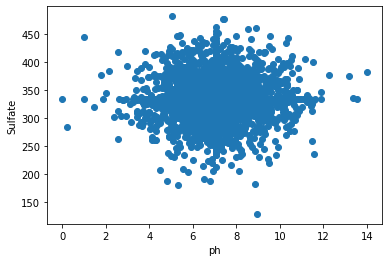

In [41]:
a = water_df_clean['ph']
b = water_df_clean['Sulfate']


plt.xlabel('ph')
plt.ylabel('Sulfate')

plt.scatter(a,b)

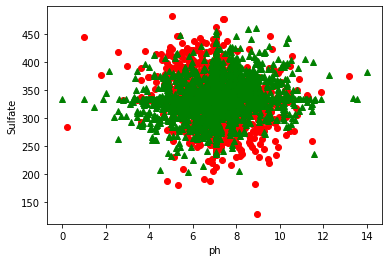

In [43]:
plt.plot(select_potable['ph'],select_potable['Sulfate'],"ro",select_not_potable['ph'],select_not_potable['Sulfate'],"g^")
plt.xlabel('ph')
plt.ylabel('Sulfate')
plt.show()

In [ ]:
import pickle

In [ ]:
#creates pickle file
#pickle.dump(forest, open('model.pkl','wb'))

# Going to choose random Forest!!